In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adodbapi.ado_consts import adVarBinary
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
from gamefication_features import TreinoRealizado, AvaliacaoFisica

tr_ids, treino = TreinoRealizado().main()

(156375, 15)
(1008485, 21)
(14450, 27)
(1669693, 27)
(1669693, 27)
(1669693, 27)


In [62]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669693 entries, 0 to 1670554
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   executadofichadia          1669693 non-null  int64  
 1   nota                       1669693 non-null  float64
 2   origem                     1669693 non-null  int64  
 3   tempoutil                  1669693 non-null  float64
 4   freepass                   1669693 non-null  int64  
 5   indicadopor                1669693 non-null  int64  
 6   pessoa                     0 non-null        float64
 7   codigo_cliente             0 non-null        float64
 8   situacao                   1669693 non-null  int64  
 9   titularplanocompartilhado  1669693 non-null  int64  
 10  codigo                     1669693 non-null  int64  
 11  dataterminoprevisto        1669693 non-null  object 
 12  diasporsemana              1669693 non-null  float64
 13  nrtreinosrealizad

In [42]:
from Utils import preencher_nulos_coluna
class TreinoRealizado:
    def __init__(self, file_path : dict = {'programa_treino' : '../dataframes/programatreino.csv','treino_realizado': '../dataframes/treinorealizado.csv','cliente' : '../dataframes/cliente.csv'}):
        self.treino = pd.read_csv(file_path['treino_realizado'], sep='\t', encoding='iso-8859-1')
        self.cliente = pd.read_csv(file_path['cliente'], sep=',', encoding='iso-8859-1')
        self.programa = pd.read_csv(file_path['programa_treino'], sep='\t', encoding='iso-8859-1')


    def _null_features(self):
        # Limpeza treino
        self.treino.drop(columns=[
            'chaveexecucao', 'comentario', 'datafim',
            'professoracompanhamento_codigo', 'unidadeexecucao'
        ], inplace=True, errors='ignore')

        self.treino = self.treino.dropna(subset=['cliente_codigo'])
        self.treino['nota'] = preencher_nulos_coluna(self.treino, 'nota')
        self.treino['tempoutil'] = preencher_nulos_coluna(self.treino, 'tempoutil')

        # Limpeza programa
        self.programa.drop(columns=[
            'codigocolaborador', 'datalancamento', 'datarenovacao',
            'emrevisaoprofessor', 'dataultimaatualizacao', 'genero',
            'idoperacaoemmassa', 'nivel_codigo', 'isgeradoporia',
            'predefinido', 'professormontou_codigo', 'professorcarteira_codigo',
            'treinorapido', 'programatreinorenovado', 'programatreinorenovacao'
        ], inplace=True, errors='ignore')

        self.programa = self.programa.dropna(subset=['cliente_codigo'])
        self.programa['diasporsemana'] = preencher_nulos_coluna(self.programa, 'diasporsemana')
        self.programa['nrtreinosrealizados'] = preencher_nulos_coluna(self.programa, 'nrtreinosrealizados')
        self.programa['totalaulasprevistas'] = preencher_nulos_coluna(self.programa, 'totalaulasprevistas')

        self.cliente.drop(columns=[
            'datainclusaospc', 'categoria', 'idexterno',
            'matriculaexterna', 'objecao', 'pessoaresponsavel',
            'responsavelfreepass', 'gympasstypenumber', 'parqpositivo',
            'renda', 'sincronizadoredeempresa', 'uacodigo'
        ], inplace=True, errors='ignore')

        self.cliente = self.cliente.dropna(subset=['codigo'])
        self.cliente['titularplanocompartilhado'] = self.cliente['titularplanocompartilhado'].notnull()
        self.cliente['indicadopor'] = self.cliente['indicadopor'].notnull()
        self.cliente['freepass'] = self.cliente['freepass'].notnull()

    def _merge(self):
        # Primeira junção: treino (t) + cliente (c)
        merged_df = pd.merge(
            self.treino,
            self.cliente,
            left_on=['cliente_codigo', '_chave'],
            right_on=['codigo', '_chave'],
            how='left',
            suffixes=('', '_cliente')
        )

        # Remove a coluna 'codigo' do cliente (já temos cliente_codigo do treino)
        if 'codigo' in merged_df.columns:
            merged_df.drop(columns=['codigo'], inplace=True)

        # Segunda junção: resultado anterior + programa (p)
        merged_df = pd.merge(
            merged_df,
            self.programa,
            left_on=['cliente_codigo', '_chave'],
            right_on=['cliente_codigo', '_chave'],
            how='left',
            suffixes=('', '_programa')
        )

        # Remover campo 'chave' de self.programa para evitar redundância
        if 'chave' in merged_df.columns:
            merged_df.drop(columns=['chave'], inplace=True)


        merged_df
        return merged_df

    def _duplicates(self):
        self.data.drop_duplicates(inplace=True)

    def main(self):
        self._null_features()
        self.data = self._merge()
        return self.data


if __name__ == '__main__':
    # av_ids, avaliacao_fisica = AvaliacaoFisica().main()
    # print(avaliacao_fisica)
    aa = TreinoRealizado().main()

In [51]:
aa.isnull().sum()

cliente_codigo                      0
datainicio                          0
executadofichadia                   0
nota                                0
origem                              0
professor_codigo                21956
programatreinoficha_codigo          0
tempoutil                           0
_chave                              0
matricula                     1670555
empresa                       1670555
freepass                      1670555
indicadopor                   1670555
pessoa                        1670555
codigo_cliente                1670555
situacao                      1670555
titularplanocompartilhado     1670555
codigo                              0
datainicio_programa                 0
dataproximarevisao                 85
dataterminoprevisto                 0
diasporsemana                       0
nome                                0
nrtreinosrealizados                 0
situacao_programa                   0
totalaulasprevistas                 0
versao      

In [48]:
aa.executadofichadia

0          True
1          True
2          True
3          True
4          True
           ... 
1670550    True
1670551    True
1670552    True
1670553    True
1670554    True
Name: executadofichadia, Length: 1670555, dtype: bool

In [37]:
programa = programa.dropna(subset=['cliente_codigo'])
programa.drop(columns = ['codigocolaborador', 'datalancamento', 'datarenovacao', 'emrevisaoprofessor', 'dataultimaatualizacao', 'genero', 'idoperacaoemmassa', 'nivel_codigo', 'isgeradoporia', 'predefinido', 'professormontou_codigo', 'professorcarteira_codigo', 'treinorapido', 'programatreinorenovado', 'programatreinorenovacao'], inplace = True, errors='ignore')


In [38]:
programa.isnull().sum()

cliente_codigo             0
codigo                     0
datainicio                 0
dataproximarevisao         1
dataterminoprevisto        0
diasporsemana            112
nome                       0
nrtreinosrealizados    11047
situacao                   0
totalaulasprevistas      112
versao                     0
_chave                     0
dtype: int64

In [39]:
programa['diasporsemana'].value_counts()

diasporsemana
5.0    9533
2.0    1912
4.0    1420
3.0     963
6.0     355
7.0      10
1.0       2
Name: count, dtype: int64

In [22]:
treino = pd.read_csv('../dataframes/treinorealizado.csv', sep='\t', encoding='iso-8859-1')
cliente = pd.read_csv('../dataframes/cliente.csv', sep = ',', encoding='iso-8859-1')

treino.drop(columns = ['chaveexecucao', 'comentario', 'datafim', 'professoracompanhamento_codigo', 'unidadeexecucao'], inplace=True, errors='ignore')

cliente.drop(columns = ['categoria', 'idexterno', 'matriculaexterna', 'objecao', 'pessoaresponsavel', 'responsavelfreepass', 'gympasstypenumber', 'parqpositivo', 'renda', 'sincronizadoredeempresa', 'uacodigo'], inplace = True, errors='ignore')

print(treino.isnull().sum())
print(cliente.isnull().sum())
        # criar

cliente_codigo                     0
codigo                             0
datainicio                         0
executadofichadia                  0
nota                          108409
origem                             0
professor_codigo                3291
programatreinoficha_codigo         0
tempoutil                     108408
_chave                             0
dtype: int64
matricula                          0
_chave                             0
empresa                            0
datainclusaospc              1008485
freepass                      996700
indicadopor                  1006777
pessoa                             0
codigo                             0
situacao                           0
titularplanocompartilhado     973142
dtype: int64


In [26]:
cliente['datainclusaospc'].value_counts().sort_index()

Series([], Name: count, dtype: int64)

In [ ]:
categoria, idexterno, matriculaexterna, objecao, pessoaresponsavel, responsavelfreepass, gympasstypenumber, parqpositivo, renda, sincronizadoredeempresa, uacodigo

_chave, empresa, datainclusaospc, pessoa, codigo

In [20]:
print(data['uacodigo'].value_counts())

uacodigo
43547.0     8
47303.0     8
32421.0     7
11303.0     7
48323.0     7
           ..
225669.0    1
158196.0    1
284991.0    1
222923.0    1
141774.0    1
Name: count, Length: 207372, dtype: int64


In [ ]:
'chaveexecucao', 'comentario', 'datafim', 'professoracompanhamento_codigo', 'unidadeexecucao'

'professor_codigo', 'cliente_codigo', 'codigo', '_chave'

# ...


In [ ]:
def cluster_hexad(save_csv=False):
    ids, features = AvaliacaoFisica().main()

    if save_csv:
        features.to_csv("amostra.csv", index=False)

    model = KMeans(n_clusters=6, random_state=42)
    model.fit(features)
    centroids = model.cluster_centers_

    distances = cdist(features, centroids, metric='euclidean')
    dist_df = pd.DataFrame(distances, columns=[f'dist_hexad_{i}' for i in range(6)])

    resultado = pd.concat([ids, dist_df], axis=1)
    return resultado, centroids

if __name__ == "__main__":
    resultado, centroides = cluster_hexad(save_csv=True)


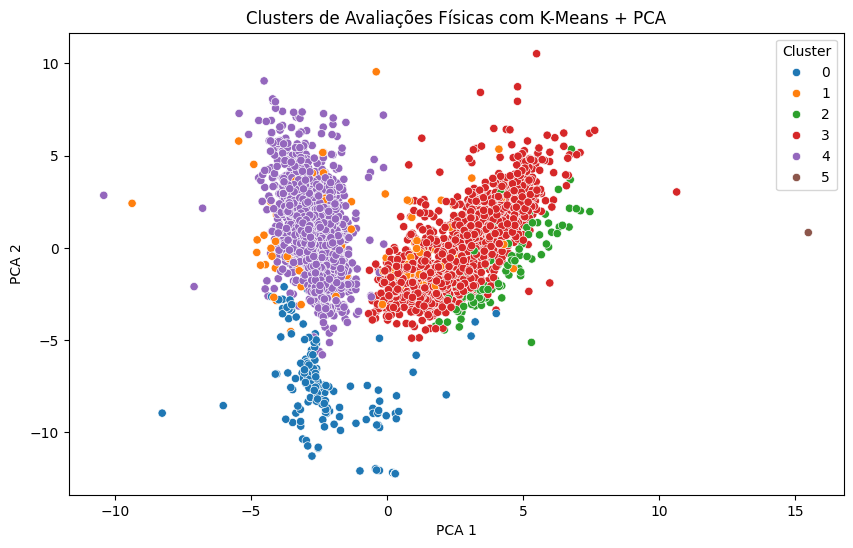

Cliente pertence ao cluster 4 -> Perfil HEXAD: Disruptor

Indícios que sustentam essa associação:
categoriaavaliacaoimc         1.088111
residual                      1.052995
categoriapercentualgordura    1.019015
protocolo                      0.94266
pesomuscular                  0.877807
percentualgordura             0.873674
gorduravisceral               0.792123
massagorda                    0.777921
idademetabolica               0.691171
imc                           0.655487
Name: 42, dtype: object


In [28]:
av = pd.read_csv("amostra.csv")

# Seleção das features numéricas para clustering
features = av.select_dtypes(include='number').columns.tolist()

# KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(av[features])
av['cluster'] = clusters

# Redução dimensional para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(av[features])
av['pca1'] = X_pca[:, 0]
av['pca2'] = X_pca[:, 1]

# Visualização dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=av, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title('Clusters de Avaliações Físicas com K-Means + PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Análise descritiva por cluster
cluster_summary = av.groupby('cluster')[features].mean()

# Sugestão de associação com HEXAD
hexad_map = {
    0: "Achiever",
    1: "Philanthropist",
    2: "Player",
    3: "Free Spirit",
    4: "Disruptor",
    5: "Socialiser"
}
av['hexad_tipo'] = av['cluster'].map(hexad_map)

# Exemplo de indicativos para justificar o cluster
exemplo_id = 42  # Substitua por um índice válido
cliente = av.loc[exemplo_id]

print(f"Cliente pertence ao cluster {cliente['cluster']} -> Perfil HEXAD: {cliente['hexad_tipo']}")
print("\nIndícios que sustentam essa associação:")
print(cliente[features].sort_values(ascending=False).head(10))

In [ ]:
# eps: distância máxima entre dois pontos para serem considerados vizinhos.
# min_samples: número mínimo de pontos para formar um cluster.

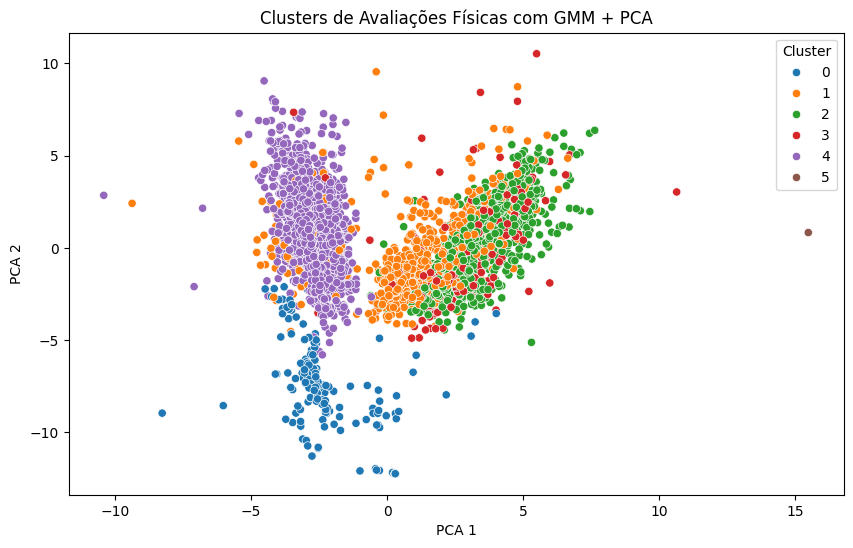

Cliente pertence ao cluster 4 -> Perfil HEXAD: Disruptor

Indícios que sustentam essa associação:
categoriaavaliacaoimc         1.088111
residual                      1.052995
categoriapercentualgordura    1.019015
protocolo                      0.94266
pesomuscular                  0.877807
percentualgordura             0.873674
gorduravisceral               0.792123
massagorda                    0.777921
idademetabolica               0.691171
imc                           0.655487
Name: 42, dtype: object


In [38]:
from sklearn.mixture import GaussianMixture  # Usar GaussianMixture

# Carregar dados
av = pd.read_csv("amostra.csv")

# Selecionar apenas colunas numéricas
features = av.select_dtypes(include='number').columns.tolist()
X = av[features]

# Padronização (importante para GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicação do GMM para 6 clusters
gmm = GaussianMixture(n_components=6, random_state=42)  # Definir n_components como 6
clusters = gmm.fit_predict(X_scaled)
av['cluster'] = clusters

# Redução dimensional para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
av['pca1'] = X_pca[:, 0]
av['pca2'] = X_pca[:, 1]

# Visualização dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=av, x='pca1', y='pca2', hue='cluster', palette='tab10', legend='full')
plt.title('Clusters de Avaliações Físicas com GMM + PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Análise descritiva por cluster
cluster_summary = av.groupby('cluster')[features].mean()

# Mapeamento arbitrário dos clusters detectados
hexad_map = {
    0: "Achiever",
    1: "Philanthropist",
    2: "Player",
    3: "Free Spirit",
    4: "Disruptor",
    5: "Socialiser"
}
av['hexad_tipo'] = av['cluster'].map(hexad_map)

# Exemplo de cliente
exemplo_id = 42
cliente = av.iloc[exemplo_id]

print(f"Cliente pertence ao cluster {cliente['cluster']} -> Perfil HEXAD: {cliente['hexad_tipo']}")
print("\nIndícios que sustentam essa associação:")
print(cliente[features].sort_values(ascending=False).head(10))